# Anime Database
#### Grupo 15
### ~ Hito 1 ~
Integrantes:

- Álvaro Morales

- Iván Larraín

- Ignacio Ancatripai

- Felipe Araya

## Introducción y motivación
En este proyecto, se explorarán los datos y estadisticas presentados en la siguiente [Base de datos de MyAnimeList](https://www.kaggle.com/CooperUnion/anime-recommendations-database).



### Contexto
El consumo global de anime (fuera de Japón) ha experimentado un alza considerable durante la década del 2010, impulsado por la creciente facilidad de acceso a series mediante plataformas de streaming (*Crunchyroll, Funimation, Netflix*, etc) que permiten acceder de manera legal a un género de televisión que por años estaba limitado a transmisiones irregulares en canales de televisión local o sitios web clandestinos. El nivel de integración a la cultura popular de estas series da paso a que exista un número creciente de datos disponibles sobre las series en si así como del público que las consume. Existen diversas plataformas en donde usuarios pueden discutir acerca de estas series, y algunas que permiten que un usuario califique y/o catalogue series según su experiencia personal con estas. Entre estas se encuentra *MyAnimeList*, la cual será la principal fuente de datos de este proyecto.

[*MyAnimeList*](https://myanimelist.net) es una comunidad virtual de catalogación de anime y manga. Al menos en occidente es la más utilizada de su tipo. Proporciona a sus usuarios un sistema basado en listas para organizar y puntuar anime y/o manga que hayan visto y contactar a otros usuarios con gustos similares, todo esto gracias a una base de datos de anime/manga muy amplia. Los usuarios pueden añadir series a sus listas y marcarlas en diversos estados ("visto", "viendo", "pausado", etc), así como otorgarles una puntuación entre 1-10.

Ha existido desde el 2005, puesta en marcha por Garrett Gyssler, y recive cerca de 120 millones de visitantes al mes.

La base de datos a utilizar contiene información publica obtenida desde este sitio web, y contiene datos sobre miles de series de anime, usuarios y sus listas recopiladas hasta el año 2018. Estos datos son interesantes de analizar pues contemplan un amplio rango de tiempo, géneros (de series) y usuarios; incluyendo información de ratings y popularidad así como datos relevantes de los usuarios (género, fecha de nacimiento, nacionalidad, etc) que permiten realizar un estudio sobre la composición del público que consume anime y a la vez encontrar posibles relaciones entre las series y los usuarios que las ven, así como realizar un análisis temporal del consumo de estas.

## Exploración de datos
Lo siguiente fue sacado direcamente de kaggle:

AnimeList.csv contiene una lista de anime, con título, sinónimos del título, género, estudio, dueño de la licencia, productor, duración, calificación, puntuación, fecha de emisión, episodios, fuente (manga, novela ligera, etc.) y muchos otros datos importantes sobre el anime individual que proporciona suficiente información sobre las tendencias en el tiempo sobre los aspectos importantes del anime. El rango está en formato flotante en csv, pero sólo contiene valores enteros. Esto se debe a los valores NaN y su representación en pandas.

UserList.csv contiene información sobre los usuarios que ven anime, concretamente el nombre de usuario, la fecha de registro (join_date), la última fecha de conexión, la fecha de nacimiento, el sexo, la ubicación y muchos valores agregados de sus listas de anime.

UserAnimeList.csv contiene listas de anime de todos los usuarios. Por cada registro, aquí está el nombre de usuario, el ID del anime, la puntuación, el estado y la fecha de la última actualización de este registro. Este archivo es muy grande, así que no lo tocaremos por ahora (al menos no su versión raw).

Este dataset (sin preprocesamiento) contiene:

- 302 675 usuarios únicos (302 573 de ellos con algunos datos demográficos)
- 80 076 112 registros en listas de anime
- 46 358 322 de ellos tienen valoraciones
- 14 478 animes únicos

Además se incluye una versión filtrada en anime_filtered.csv, animelists_filtered.csv y users_filtered.csv. Consiste en usuarios que tienen la fecha de nacimiento, la ubicación y el género rellenados. Por lo tanto, contiene muchos menos datos de animelists.

Pero todas las características importantes, como la media y la variación de la puntuación, o los géneros en las listas de animación, no cambian cuando se omiten los usuarios con algunos datos que faltan, por lo que incluso con los datos filtrados deberíamos obtener la misma información.

Estos contienen:

- 116 133 usuarios únicos con datos demográficos
- 35 802 010 registros en listas de anime
- 20 726 794 de ellos tienen valoraciones
- 14 474 animes únicos

Por último, también se incluyen datos "limpios" en anime_cleaned.csv, animelists_cleaned.csv y users_cleaned.csv. Esta versión limpiada ha truncado a todos los usuarios con un número ridículamente grande de episodios en animes que obviamente no tienen tantos episodios, los episodios vistos más grandes que el número de episodios en un anime individual fueron arreglados y los episodios vistos y el watchtime fue recalculado en consecuencia. Para algunos usuarios, la última vez que se conectaron fue en el año 1900, u otros valores extraños, por lo que su última actividad se dedujo de su última marca de tiempo de actualización de la lista de animes.

Muchos usuarios rellenaron incorrectamente el número de episodios vistos o repetidos. En el caso de los animes en los que se han visto más episodios de los que tiene el anime, los episodios vistos se han reescrito como número de episodios de ese anime. El tiempo de visionado y el número de episodios vistos se han corregido en consecuencia.
Los usuarios demasiado jóvenes y demasiado viejos, obviamente, se han truncado también.

Habían 6 usuarios con sospechosamente muchos episodios vistos. Fueron truncados, son muy pocos usuarios para afectar a las estadísticas.

### Verifiquemos algunas de estas aseveraciones.

A continuación, comprobaremos algunas de las cosas que asegura el análisis hecho por los autores de este dataset.

UserAnimeList.csv pesa >5GB, y sus versiones filtradas >2GB c/u. Por esto, ignoraremos las versiones raw y filtered. Compararemos las otras para verificar el análisis hecho por los autores.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# Raw, unfiltered data ~5GB
# user_animelist = pd.read_csv('database/UserAnimeList.csv') -> This takes up a ridiculous amount of space (>5GB), so we're skipping them
user_list = pd.read_csv('database/UserList.csv')
anime_list = pd.read_csv('database/AnimeList.csv')

# Filtered data ~2GB
#animelists_filtered = pd.read_csv('database/animelists_filtered.csv') -> no point keeping this one + too big
users_filtered = pd.read_csv('database/users_filtered.csv')
anime_filtered = pd.read_csv('database/anime_filtered.csv')

# Cleaned data ~2GB
animelists_cleaned = pd.read_csv('database/animelists_cleaned.csv')
users_cleaned = pd.read_csv('database/users_cleaned.csv')
anime_cleaned = pd.read_csv('database/anime_cleaned.csv')

In [12]:
# tamaños
print("fyi: (rows, columns)")
print(f"user_list: {user_list.shape}")
print(f"anime_list: {anime_list.shape}")
print()
print(f"users_filtered: {users_filtered.shape}")
print(f"anime_filtered: {anime_filtered.shape}")
print()
print(f"animelists_cleaned: {animelists_cleaned.shape}")
print(f"users_cleaned: {users_cleaned.shape}")
print(f"anime_cleaned: {anime_cleaned.shape}")

fyi: (rows, columns)
user_list: (302675, 17)
anime_list: (14478, 31)

users_filtered: (116133, 17)
anime_filtered: (14474, 31)

animelists_cleaned: (31284030, 11)
users_cleaned: (108711, 17)
anime_cleaned: (6668, 33)


In [13]:
animelists_cleaned.info() # listas de anime de los usuarios

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31284030 entries, 0 to 31284029
Data columns (total 11 columns):
 #   Column               Dtype  
---  ------               -----  
 0   username             object 
 1   anime_id             int64  
 2   my_watched_episodes  int64  
 3   my_start_date        object 
 4   my_finish_date       object 
 5   my_score             int64  
 6   my_status            int64  
 7   my_rewatching        float64
 8   my_rewatching_ep     int64  
 9   my_last_updated      object 
 10  my_tags              object 
dtypes: float64(1), int64(5), object(5)
memory usage: 2.6+ GB


In [14]:
users_cleaned.info() # info de los usuarios

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108711 entries, 0 to 108710
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   username                  108710 non-null  object 
 1   user_id                   108711 non-null  int64  
 2   user_watching             108711 non-null  int64  
 3   user_completed            108711 non-null  int64  
 4   user_onhold               108711 non-null  int64  
 5   user_dropped              108711 non-null  int64  
 6   user_plantowatch          108711 non-null  int64  
 7   user_days_spent_watching  108711 non-null  float64
 8   gender                    108711 non-null  object 
 9   location                  108706 non-null  object 
 10  birth_date                108711 non-null  object 
 11  access_rank               0 non-null       float64
 12  join_date                 108711 non-null  object 
 13  last_online               108711 non-null  o

In [15]:
anime_cleaned.info() # info de los anime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6668 entries, 0 to 6667
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   anime_id         6668 non-null   int64  
 1   title            6668 non-null   object 
 2   title_english    3438 non-null   object 
 3   title_japanese   6663 non-null   object 
 4   title_synonyms   4481 non-null   object 
 5   image_url        6666 non-null   object 
 6   type             6668 non-null   object 
 7   source           6668 non-null   object 
 8   episodes         6668 non-null   int64  
 9   status           6668 non-null   object 
 10  airing           6668 non-null   bool   
 11  aired_string     6668 non-null   object 
 12  aired            6668 non-null   object 
 13  duration         6668 non-null   object 
 14  rating           6668 non-null   object 
 15  score            6668 non-null   float64
 16  scored_by        6668 non-null   int64  
 17  rank          

El creador del dataset menciona que hay 6 usuarios con un número excesivamente alto de episodios.

<AxesSubplot: title={'center': 'Usuarios por número de episodios vistos'}, xlabel='Usuario', ylabel='Episodios vistos'>

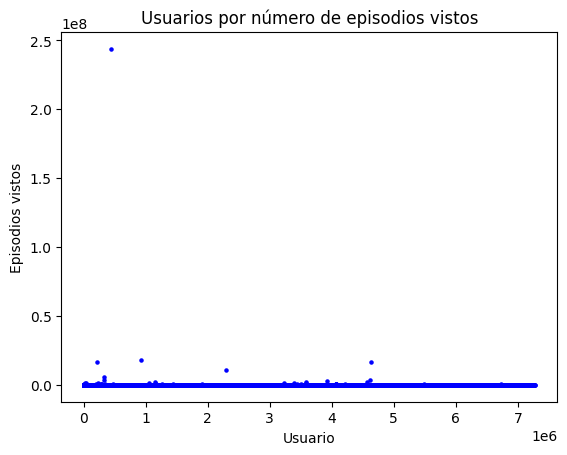

In [16]:
# Veremos a los usuarios por número de episodios vistos
user_list[['username','stats_episodes']].sort_values('stats_episodes', ascending=False).head(10)
# Graficar usuarios por numero de episodios vistos
user_list.plot.scatter(x='user_id', y='stats_episodes', xlabel="Usuario", ylabel="Episodios vistos", color="blue", size=5, title='Usuarios por número de episodios vistos')

Se pueden observar a simple vista al menos 6 puntos con una cantidad excesivamente mayor al resto. Es interesante ver el punto que más se aleja del resto, correspondiente al usuario con mayor cantidad de episodios vistos.

In [17]:
# Obtenemos al usuario con mayor cantidad de episodios
user_list[user_list['stats_episodes'] == user_list['stats_episodes'].max()]

,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,access_rank,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes
45081,warrose,443232,35,2034,0,1,7,2601351.02,Male,San Luis,1994-01-21,NaN,2011-02-01,2014-12-28 21:54:00,1.01,0.0,243794881.0


Este usuario aparentemente ha visto 243.794.881 episodios en total. Si se accede a su [perfil](https://myanimelist.net/animelist/warrose?status=7&order=4&order2=0) en el sitio web es posible notar con que sus datos son muy probablemente falsos (todas las series con el mismo puntaje, algunas con un número imposiblemente grande de episodios). Esta clase de datos no aportan al dataset y por esa razón son eliminados por el autor para las versiones *clean*.

In [18]:
# ^^^ como todos los campos son exactamente la cantidad de filas (con algunas excepciones), parece que la limpieza fue bien hecha.
# interesantenemte, hay un usuario con nombre null:
users_cleaned[users_cleaned["username"].isnull()]

,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,access_rank,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes
51311,NaN,300142,12,158,8,21,62,39.304167,Male,Serbia,1996-12-30 00:00:00,NaN,2010-03-01 00:00:00,2018-05-20 04:06:06,6.58,30.0,2524


En el dataset de usuarios se encuentra que había una fila en donde username era null. Esto en un comienzo parece ser un dato erróneo pero se decide investigar.
Se pudo encontrar a este usuario con la siguiente URL incluyendo su id: [https://myanimelist.net/comments.php?id=300142](https://myanimelist.net/comments.php?id=300142). Su nombre, efectivamente es [null](https://myanimelist.net/profile/null). Esto produjo que al leer el archivo .csv se tomara como NaN.

In [19]:
# Vamos a renombrar el usuario con nombre null a "null"
users_cleaned.loc[users_cleaned["username"].isnull(), "username"] = "null"
# Obtenemos nuevamente al usuario con nombre "null"
users_cleaned[users_cleaned["username"] == "null"]

,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,access_rank,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes
51311,null,300142,12,158,8,21,62,39.304167,Male,Serbia,1996-12-30 00:00:00,NaN,2010-03-01 00:00:00,2018-05-20 04:06:06,6.58,30.0,2524


In [20]:
# Ahora al revisar nuevamente users_cleaned, veremos que ya no hay usuarios con nombre NaN
users_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108711 entries, 0 to 108710
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   username                  108711 non-null  object 
 1   user_id                   108711 non-null  int64  
 2   user_watching             108711 non-null  int64  
 3   user_completed            108711 non-null  int64  
 4   user_onhold               108711 non-null  int64  
 5   user_dropped              108711 non-null  int64  
 6   user_plantowatch          108711 non-null  int64  
 7   user_days_spent_watching  108711 non-null  float64
 8   gender                    108711 non-null  object 
 9   location                  108706 non-null  object 
 10  birth_date                108711 non-null  object 
 11  access_rank               0 non-null       float64
 12  join_date                 108711 non-null  object 
 13  last_online               108711 non-null  o

Se puede obtener de los datos actuales los géneros más populares de anime, por dos criterios:
Primero, los géneros más populares por número de series producidas de ese género.

<AxesSubplot: title={'center': 'Cantidad de generos'}, xlabel='Cantidad', ylabel='Genero'>

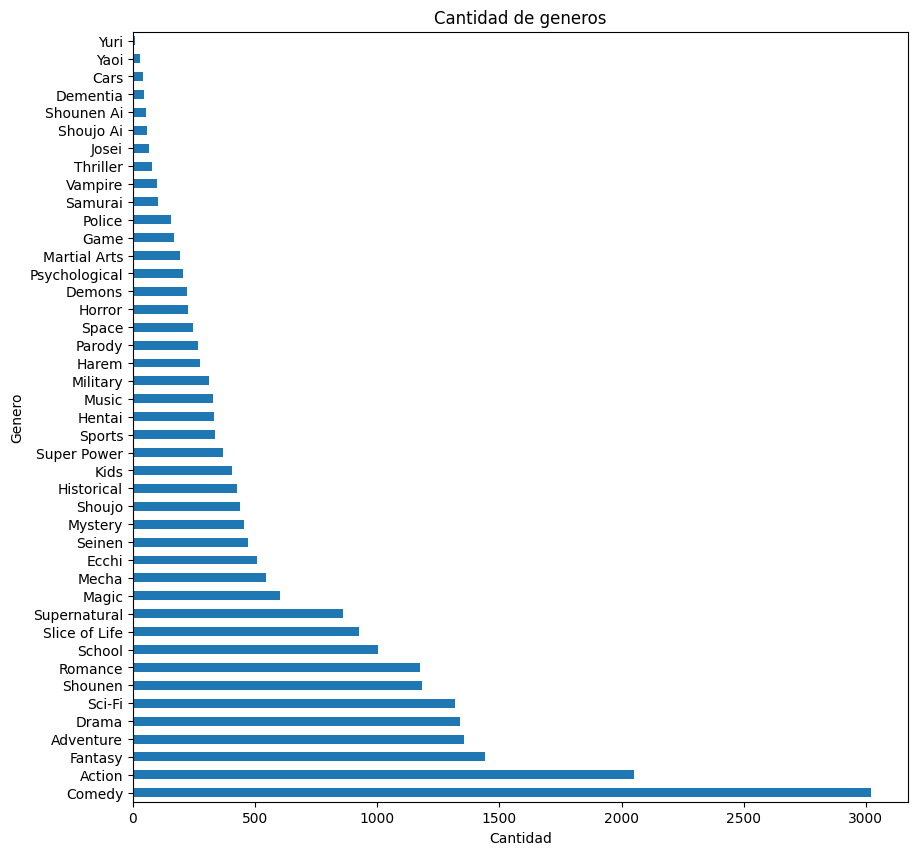

In [21]:
# Obtenemos los generos y contamos sus apariciones.
anime_genres = anime_cleaned["genre"].str.split(", ", expand=True).stack().value_counts(dropna=False)
# Graficamos los generos
anime_genres.plot.barh(xlabel="Cantidad", ylabel="Genero", title="Cantidad de generos", figsize=(10, 10))

De esto se puede desprender que los animes más producidos son los de género comedia, seguido por acción y fantasía.
A continuación se realiza el análisis de popularidad según cuántas personas tienen estos animes en sus listas de anime. Para tener resultados más precisos se consideran solo aquellos usuarios que tengan estos animes en estados "completed" (2) o "watching" (1), pues un uso común de páginas como *MyAnimeList* es marcar animes que el usuario desea ver pero no necesariamente ha visto aún.

<AxesSubplot: title={'center': 'Géneros ordenados por apariciones en anime lists'}, xlabel='Cantidad', ylabel='Genero'>

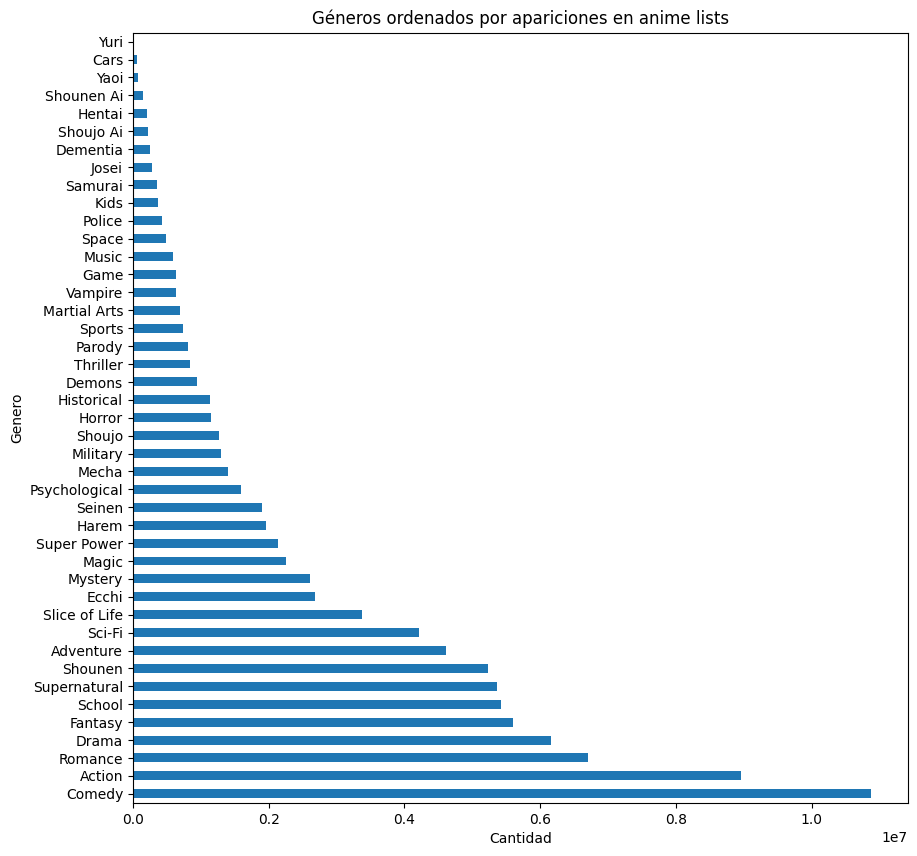

In [57]:
# Anime lists con animes en estado 1 o 2
animelists_watched_completed = animelists_cleaned[(animelists_cleaned["my_status"] == 1) | (animelists_cleaned["my_status"] == 2)]

# Obtenemos el id y genero de los animes
anime_genres = anime_cleaned[["anime_id", "genre"]]
# Unimos los dos dataframes
animelists_watched_completed = animelists_watched_completed.merge(anime_genres, on="anime_id")
animelists_watched_completed.head()
# Obtenemos los generos y contamos sus apariciones.
anime_genres = animelists_watched_completed["genre"].str.split(", ", expand=True).stack().value_counts(dropna=False)
# Graficamos los generos
anime_genres.plot.barh(xlabel="Cantidad", ylabel="Genero", title="Géneros ordenados por apariciones en anime lists", figsize=(10, 10))

De esto se desprende que los géneros más vistos siguen siendo comedia y acción, pero el tercer puesto pasa a ser ocupado por el género de romance, y el anterior tercer puesto (fantasía) baja al 5to puesto. Esto puede indicar que el género de romance tiene una audiencia mayor a pesar de que es menos producido que el género de fantasía. Y no es el único, a pesar de que en la mayoria de géneros coincide la cantidad de animes producidos con la popularidad, hay varios casos en donde no calzan como se esperaría.

¿Por que pasa esto? Es una pregunta interesante. Tal vez la gente que ocupa MAL, no necesariamente representa a la mayoría de consumidores de anime. Se podría deducir que los usuarios de MAL, en cierta forma, comparten algunos gustos, que difieren en algunos géneros de el total de consumidores occidentales de anime.

Géneros para adultos (i.e Hentai), a pesar de ser muy propducidos, caen considerablemente en popularidad. Vale recordar que MAL solo toma en cuenta animes vistos si es que los usuarios los agregan a sus listas. La data podría indicar que a pesar de que el Hentai es muy visto, poca gente lo agrega como visto. Como las listas son públicas, se puede hipotetizar que la mayoría de usuarios no quiere hacer público que contenido para adultos que ha visto, o que simplemente la gente que consume este tipo de contenido no usa MAL. Esto también podría aplicar a otros géneros.

Vale destacar que MAL es ocupado por audiencias principalmente occidentales, y los estudios de anime están más interesados en la popularidad en Japón. Puede que allá calzen mejor las estadísticas.

Además, solo viendo los totales, no estamos considerando fechas de emisión o de vista. Es posible que estas disparidades se deban a que algunos géneros no eran muy populares antiguamente, pero tuvieron un boom importante en popularidad a partir de alguna fecha (o viceversa), lo cual podría resultar en una gran cantidad de anime de ciertos géneros, que no fueron muy populares en su época, pero que explotaron en popularidad más recientemente (o viceversa), después de la creación de MAL, en donde usuarios expresaron ésta nueva popularidad. 

Otro análisis interesante de realizar es un análisis temporal del anime.
Si se agrupan los animes por su año de producción (año en que comienzan a emitirse), se obtiene el siguiente gráfico:

<AxesSubplot: title={'center': 'Cantidad de animes por año'}, xlabel='Año', ylabel='Cantidad'>

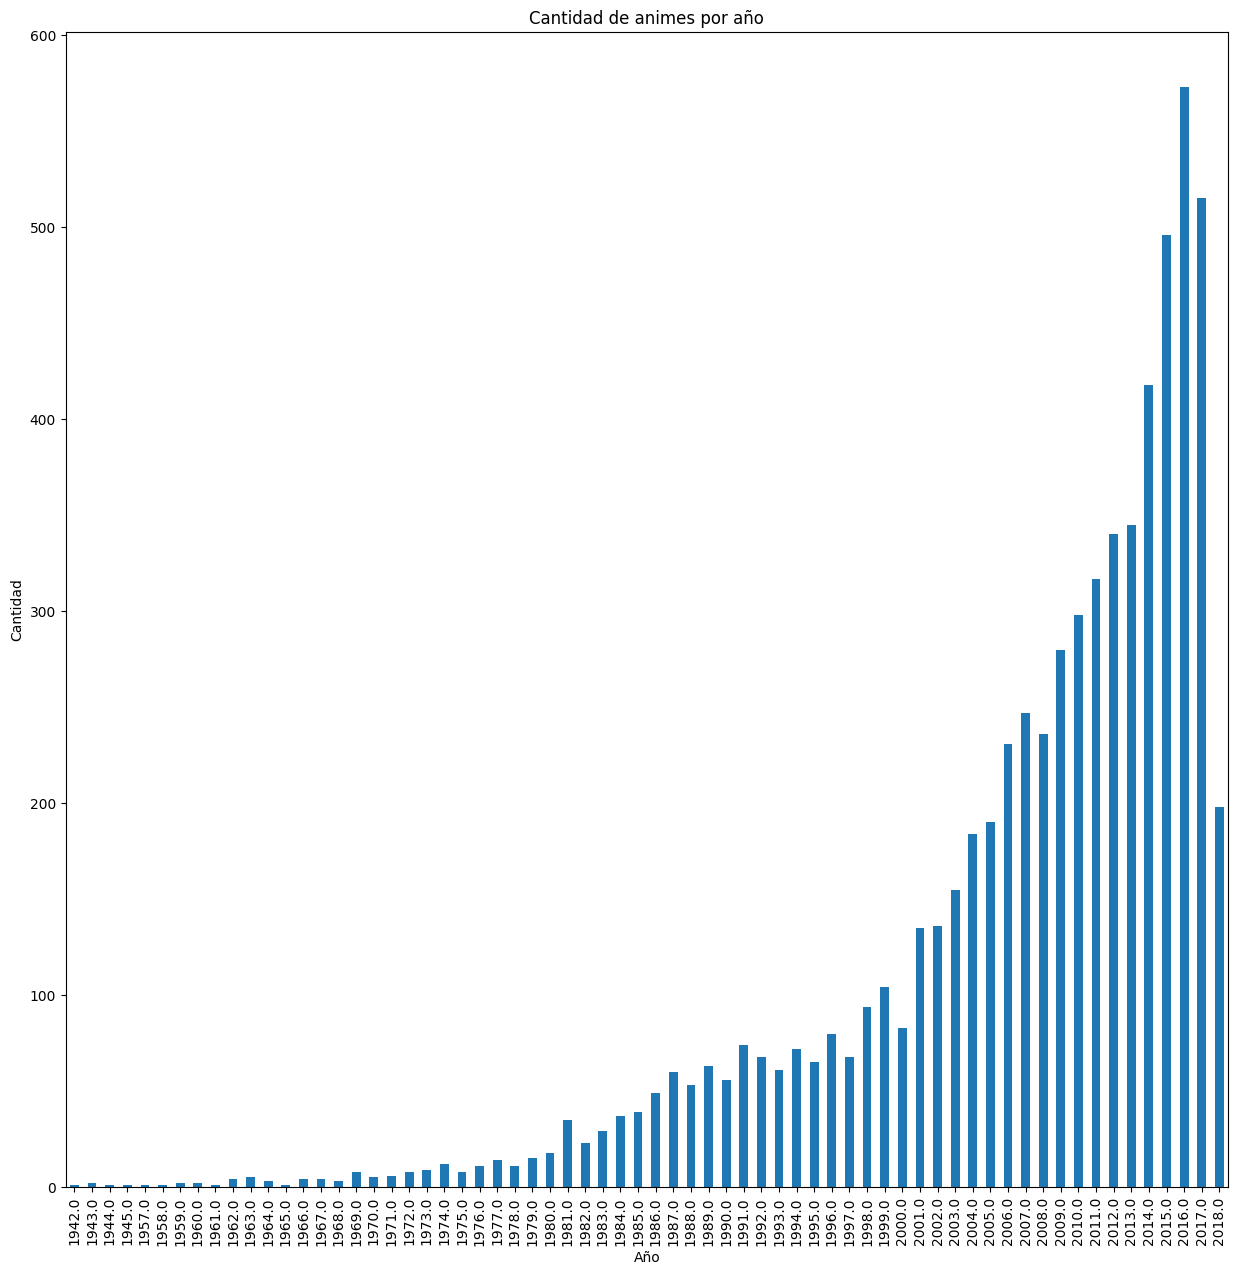

In [36]:
# Agrupar por aired_from_year y contar
anime_cleaned.groupby("aired_from_year").size().plot.bar(xlabel="Año", ylabel="Cantidad", title="Cantidad de animes por año", figsize=(15, 15))

En el gráfico se aprecia el explosivo crecimiento que el anime ha tenido en los años 2000, y notablemente en la década del 2010.
Se puede también obtener un gráfico de los géneros más populares en periodos de 2 años:

<AxesSubplot: title={'center': 'Cantidad de animes por intervalo de 2 años y género'}, xlabel='Intervalo', ylabel='Cantidad'>

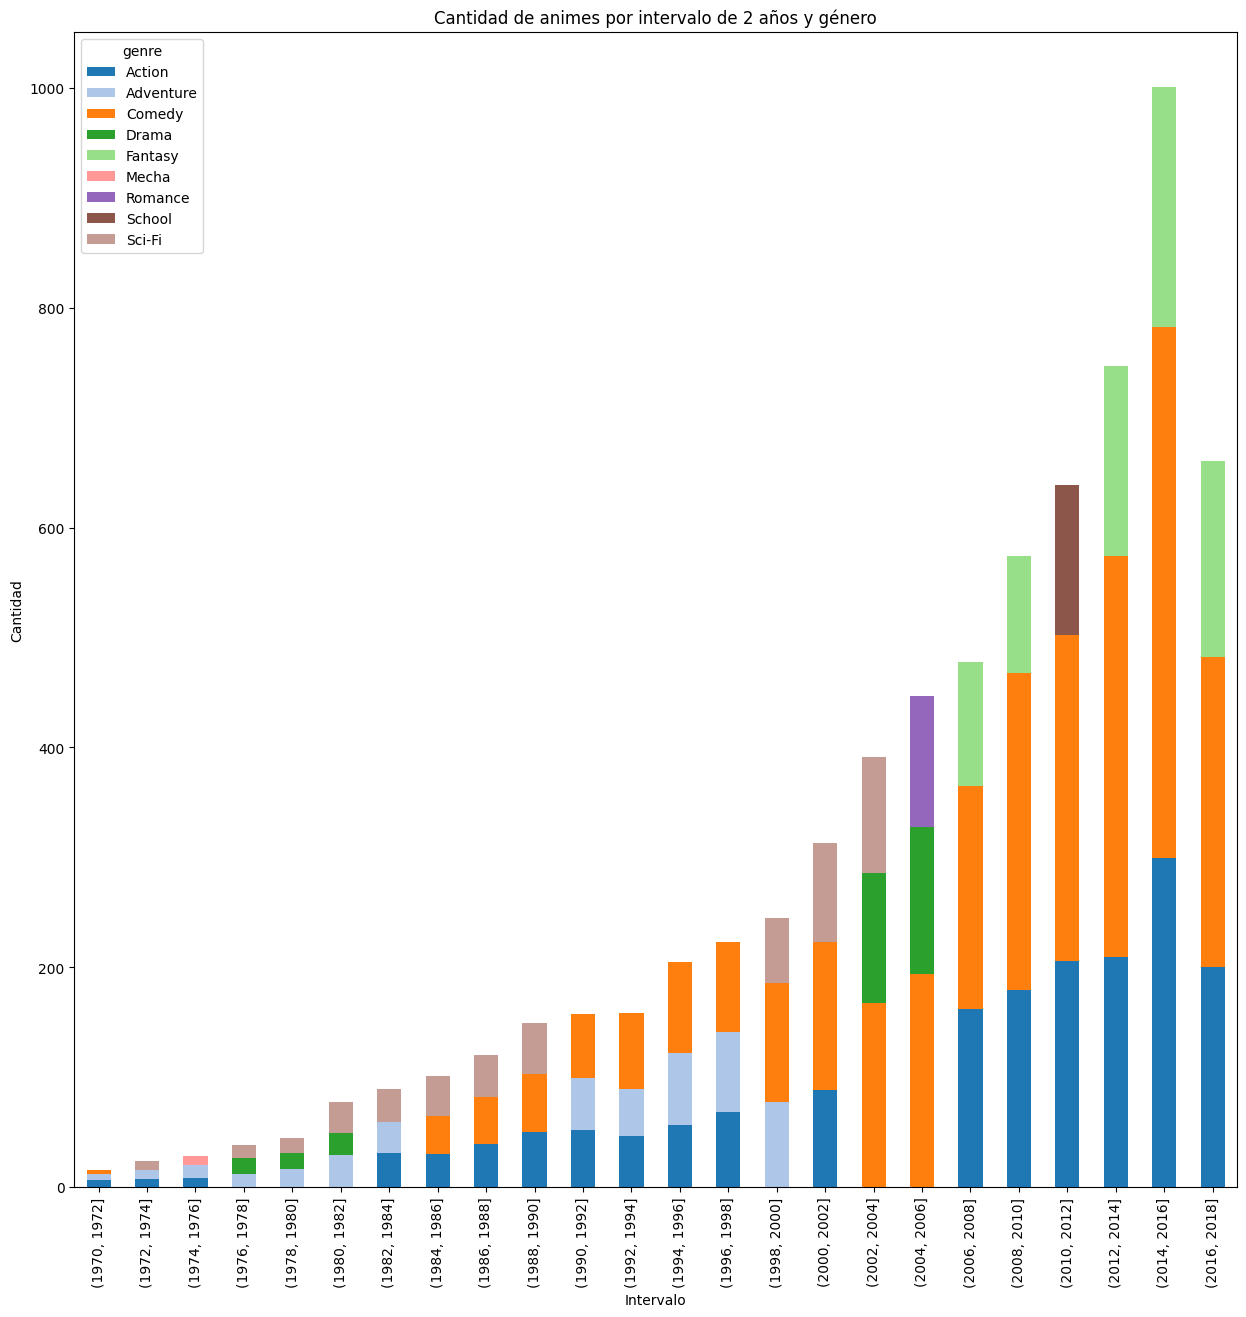

In [248]:
# Se separan los generos primero en filas distintas y luego se pasan a columnas para poder graficarlas.
anime_genres = anime_cleaned["genre"].str.split(", ", expand=True).stack().reset_index(level=1, drop=True).rename("genre")
anime_genres = anime_cleaned.drop("genre", axis=1).join(anime_genres)
anime_genres = anime_genres.groupby(["aired_from_year", "genre"]).size().unstack()
# Se agrupan por cada 2 años, partiendo en 1960. Se ignoran los que vienen antes pues son muy pocos datos y no se aprecian en el gráfico
# (como se puede ver en el gráfico de cantidad de animes por año).
anime_genres = anime_genres.groupby(pd.cut(anime_genres.index, np.arange(1970, 2020, 2))).sum()

# Obtenemos los 3 más populares por año, el resto se quedará como NaN
anime_genres = anime_genres.apply(lambda x: x.nlargest(3), axis=1)

#


# Plot
colormap = plt.cm.tab20
colors = [colormap(i) for i in np.linspace(0.0, 1.0, 15)]
anime_genres.plot.bar(stacked=True, xlabel="Intervalo", ylabel="Cantidad", title="Cantidad de animes por intervalo de 2 años y género", figsize=(15, 15), color=colors)
